In [1]:
import sklearn



C:\Users\saheediyanda\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip3  install sklearn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
pip install packaging

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
import sklearn
sklearn.__file__

'C:\\Users\\saheediyanda\\Anaconda3\\lib\\site-packages\\sklearn\\__init__.py'

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [7]:
churn_df = pd.read_csv('telecom_churn_clean.csv')

In [8]:
churn_df.head()


,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [10]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
print(X_new)
y_prediction = knn.predict(X_new)

[[ 30.   17.5]
 [107.   24.1]
 [213.   10.9]]


In [11]:
y_prediction

array([0, 1, 0], dtype=int64)

In [12]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify = y connotes ensuring the target label proportions reflect that of the original dataset.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


In [13]:
a = np.arange(1,12)
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [14]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    
# Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
# Fit the model
    knn.fit(X_train, y_train)
  
# Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


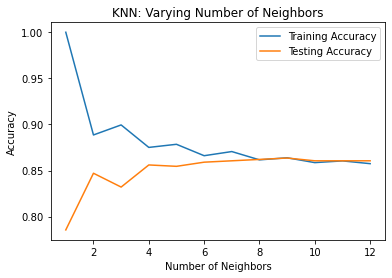

In [15]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors,train_accuracies.values(), label = "Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv')

In [18]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000,6566.23,2907.98,Mega,54732.76
1,13000,9237.76,2409.57,Mega,46677.90
2,41000,15886.45,2913.41,Mega,150177.83
3,83000,30020.03,6922.30,Mega,298246.34
4,15000,8437.41,1406.00,Micro,56594.18


In [19]:
y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)

In [20]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


In [21]:
# Method 2
X = sales_df.drop('sales',axis=1).values
print(X.shape)

(4546, 4)


In [22]:
print(X.shape)

(4546, 4)


In [23]:
X = X[:, 1].reshape(-1,1)

In [24]:
print(X.shape)

(4546, 1)


In [25]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


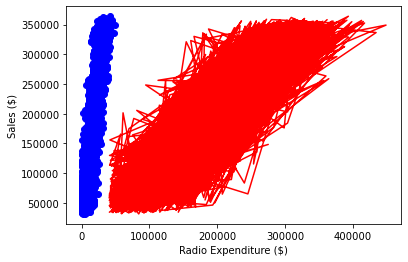

In [26]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(predictions, y, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

In [27]:
# Create X and y arrays
from sklearn.model_selection import train_test_split
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# # Make predictions
# y_pred = reg.predict(X_test)
# print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

LinearRegression()

In [28]:
X_train.dtype

dtype('float64')

In [29]:
X

array([[16000.  ,  6566.23,  2907.98],
       [13000.  ,  9237.76,  2409.57],
       [41000.  , 15886.45,  2913.41],
       ...,
       [44000.  , 19800.07,  5096.19],
       [71000.  , 17534.64,  1940.87],
       [42000.  , 15966.69,  5046.55]])

In [30]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)
y_pred = reg.predict(X_test)

# Compute RMSE
rmse = mean_squared_error(y_test,y_pred, squared=False)

# Print the metrics
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]
R^2: 0.9990152104759368
RMSE: 2944.4331996000956


In [31]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold



# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X,y, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]
0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


In [32]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


In [33]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
# plt.bar(X.column, lasso_coef)
# plt.xticks(rotation=45)
# plt.show()

[ 3.56256962 -0.00397035  0.00496385]


In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
diabet_df = pd.read_csv('diabetes_clean.csv')
print(diabet_df.head())

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


ValueError: Unknown label type: 'continuous'

In [ ]:
# Logistic Regrression and ROC curve
from sklearn.linear_model import LogisticRegression
diabet_df = pd.read_csv('diabetes_clean.csv')
print(diabet_df.head())


In [ ]:
X = diabet_df.drop('diabetes',axis=1).values
print(X.shape)

In [ ]:
y = diabet_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

In [ ]:
# y_pred_probs = logreg.predict_proba(X_test)

In [ ]:
# y_pred_probs[:5]

In [ ]:
print(y_test.shape)

In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test,y_pred))

In [ ]:
#Hyperparameter tunning
diabet_df = pd.read_csv('diabetes_clean.csv')
print(diabet_df.head())

In [ ]:
X = diabet_df.drop('glucose',axis=1).values
print(X.shape)
y = diabet_df['glucose'].values
print(y.shape)

In [ ]:
a = np.linspace(0.00001, 1, 20)
print(a)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=19)
kf = KFold(n_splits=5, shuffle=True, random_state=21)

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

In [ ]:
X = diabet_df.drop('diabetes',axis=1).values
print(X.shape)
y = diabet_df['diabetes'].values
print(y.shape)

In [ ]:
# import Randomsearchcv
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg = LogisticRegression()
logreg_cv = RandomizedSearchCV(logreg,params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)


In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

In [ ]:
#Preprocessing
music_df = pd.read_csv('music_clean.csv')
music_df.head()

In [ ]:
# # Create music_dummies
# music_dummies = pd.get_dummies(music_df, drop_first=True)

# # Print the new DataFrame's shape
# print("Shape of music_dummies: {}".format(music_dummies.shape))
# print(music_dummies.head())
# print(music_df)

# # Create X and y
# X = music_dummies.drop('popularity',axis=1).values
# y = music_dummies['popularity']

# # Instantiate a ridge model
# ridge = Ridge(alpha=0.2)

# # Perform cross-validation
# scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# # Calculate RMSE
# rmse = np.sqrt(-scores)
# print("Average RMSE: {}".format(np.mean(rmse)))
# print("Standard Deviation of the target array: {}".format(np.std(y)))

# Great work! An average RMSE of approximately 8.24 is lower 
# than the standard deviation of the target variable (song popularity), 
# suggesting the model is reasonably accurate.


# # Print missing values for each column
# print(music_df.isna().sum().sort_values())

# # Remove values where less than 5% are missing
# music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# # Convert genre to a binary feature
# music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

# print(music_df.isna().sum().sort_values())
# print("Shape of the `music_df`: {}".format(music_df.shape))

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# imputer = SimpleImputer(strategy='mean')
# knn = KNeighborsClassifier(3)

# # Instantiate an imputer
# imputer = SimpleImputer(strategy='mean')

# # Instantiate a knn model
# knn = KNeighborsClassifier(3)

# # Build steps for the pipeline
# steps = [("imputer", imputer), 
#          ("knn", knn)]

In [ ]:
# steps = [("imputer", imp_mean),
#         ("knn", knn)]

# # Create the pipeline
# pipeline = Pipeline(steps)

# # Fit the pipeline to the training data
# pipeline.fit(X_train,y_train)

# # Make predictions on the test set
# y_pred = pipeline.predict(X_test)

# # Print the confusion matrix
# print(confusion_matrix(y_test, y_pred))

In [57]:
# Centering/Scaling
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

NameError: name 'Pipeline' is not defined

In [41]:
#Evaluating multiple models
import matplotlib.pyplot as plt
music_df = pd.read_csv('music_clean.csv')
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [42]:
X = music_df.drop('energy',axis=1).values
y=music_df['energy']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=19)

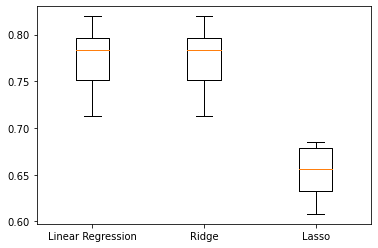

In [43]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [44]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train,y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.11381501222158255
Ridge Test Set RMSE: 0.11386982576128171
Lasso Test Set RMSE: 0.15009657279764868


In [48]:
X = music_df.drop('genre',axis=1).values
y=music_df['genre']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=21)

C:\Users\saheediyanda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saheediyanda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

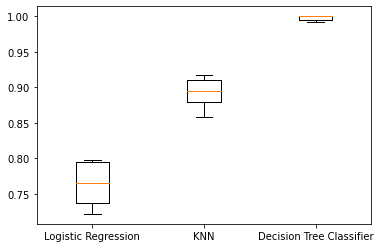

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []


for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits = 6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results =  cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [60]:
!pip install pipeline

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [65]:
# Create steps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test,y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.556, 'logreg__solver': 'newton-cg'}, Accuracy: 0.88
